In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df=pd.read_excel('제공데이터/실적데이터.xlsx', header=1, encoding='utf-8')
df.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


# 실적데이터 전처리

In [3]:
df['취급액'] = df['취급액'].fillna(0)

In [4]:
len(df[df["상품군"]=='무형'])

937

상품군 무형 제외

In [5]:
df=df.drop(df[df['상품군']=='무형'].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   20588 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


취급액 0원 제외

In [6]:
df=df.fillna(method = 'ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


노출(분) int형으로 타입 변환

In [7]:
df = df.astype({'노출(분)':'int64', '취급액':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  int64         
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 2.6+ MB


In [8]:
df.dtypes

방송일시     datetime64[ns]
노출(분)             int64
마더코드              int64
상품코드              int64
상품명              object
상품군              object
판매단가              int64
취급액               int64
dtype: object

요일 항목 추가

In [9]:
df['요일']=df['방송일시'].dt.month
df=df.replace(['월', '화', '수', '목', '금', '토', '일'], [1, 2, 3, 4, 5, 6, 7])
df.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1


주문량 항목 추가

In [10]:
df['주문량']=df['취급액']/df['판매단가']
df.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,52.606516
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,109.548872
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,81.754386
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,174.310777
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,167.218045


상품군 타입 변환

In [11]:
df=df.replace(['의류', '속옷', '주방', '농수축', '이미용', '가전',  '생활용품', '건강기능', '잡화', '가구', '침구'],
               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
df.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045


월 항목 추가

In [12]:
df['월']=df['방송일시'].dt.month
df.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1


시간대 항목 추가

In [13]:
df['시간대']=df['방송일시'].dt.hour
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1,6
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1,6
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1,6
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1,6
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1,6


분 항목 추가

In [14]:
df['분']=df['방송일시'].dt.minute
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,분
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1,6,0
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1,6,0
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1,6,20
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1,6,20
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1,6,40


In [15]:
df['날짜']=df['방송일시'].dt.day
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,분,날짜
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1,6,0,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1,6,0,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1,6,20,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1,6,20,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1,6,40,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  int64         
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  int64         
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  int64         
 8   요일      37372 non-null  int64         
 9   주문량     37372 non-null  float64       
 10  월       37372 non-null  int64         
 11  시간대     37372 non-null  int64         
 12  분       37372 non-null  int64         
 13  날짜      37372 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(11), object(1)
memory usage: 4.3+ MB


# 시청률데이터 전처리

In [17]:
df2=pd.read_excel('제공데이터/시청률데이터.xlsx', header=1, parse_dates=[0], encoding='utf-8')
df2.head(5)

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [18]:
df2=df2.drop(1440,0)
df2=df2.drop("2019-01-01 to 2019-12-31", 1)
df2.tail(5)

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
1435,01:55,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.0,0.0,0.015,0.0,0.0,0.000,0.0
1436,01:56,0.0,0.0,0.0,0.0,0.027,0.0,0.0,0.0,0.000,...,0.0,0.013,0.000,0.0,0.0,0.015,0.0,0.0,0.000,0.0
1437,01:57,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.0,0.0,0.015,0.0,0.0,0.000,0.0
1438,01:58,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.017,0.0,0.0,0.015,0.0,0.0,0.019,0.0
1439,01:59,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.0,0.0,0.015,0.0,0.0,0.000,0.0


##### raw data의 2019-01-01 ~ 19.10.31은 6:00 ~ 2:00로 운영하였음 11.01부터 6:20 ~ 2:20운영

#중복되는 2시 20분 ~ 6시 00분까지 삭제

In [19]:
df_first=df2.iloc[:20]
df_second=df2.iloc[240:]
df2=pd.concat([df_first, df_second])

#행과 열 바꾸기

In [20]:
df_t = df2.T
df_t.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
2019-01-01,0,0,0,0,0,0,0,0,0,0.014,...,0,0,0,0,0,0,0,0,0,0
2019-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0.014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_melt = df2.melt(id_vars=['시간대'], var_name='날짜')
df_melt.head(5)

,시간대,날짜,value
0,02:00,2019-01-01,0.0
1,02:01,2019-01-01,0.0
2,02:02,2019-01-01,0.0
3,02:03,2019-01-01,0.0
4,02:04,2019-01-01,0.0


In [22]:
df_melt['날짜']=pd.to_datetime(df_melt['날짜'])
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445300 entries, 0 to 445299
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   시간대     445300 non-null  object        
 1   날짜      445300 non-null  datetime64[ns]
 2   value   445300 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.2+ MB


In [23]:
df_melt.loc[:,'날짜'] = pd.to_datetime(df_melt['날짜'].astype(str)+' '+df_melt['시간대'].astype(str))
df_melt.drop(columns=['시간대'],inplace=True)
df_melt.head(5)

,날짜,value
0,2019-01-01 02:00:00,0.0
1,2019-01-01 02:01:00,0.0
2,2019-01-01 02:02:00,0.0
3,2019-01-01 02:03:00,0.0
4,2019-01-01 02:04:00,0.0


In [24]:
df_melt.rename(columns = {'날짜' : '방송일시', 'value' : '시청률'}, inplace = True)
df_melt.head(5)

,방송일시,시청률
0,2019-01-01 02:00:00,0.0
1,2019-01-01 02:01:00,0.0
2,2019-01-01 02:02:00,0.0
3,2019-01-01 02:03:00,0.0
4,2019-01-01 02:04:00,0.0


# 기상데이터

In [25]:
df_ww=pd.read_csv("제공데이터/강수데이터.csv", encoding='CP949', skiprows=7, parse_dates=[0])
df_ww.head(5)

,날짜,지점,강수량(mm)
0,2019-01-01,108,NaN
1,2019-01-02,108,NaN
2,2019-01-03,108,NaN
3,2019-01-04,108,NaN
4,2019-01-05,108,NaN


In [26]:
del df_ww['지점']
df_ww['강수량(mm)']=df_ww['강수량(mm)'].fillna(0)
df_ww.head(5)

,날짜,강수량(mm)
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-05,0.0


# 데이터 합치기

In [27]:
df_d=df.drop_duplicates('방송일시', keep='last')
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20588 entries, 1 to 38303
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    20588 non-null  datetime64[ns]
 1   노출(분)   20588 non-null  int64         
 2   마더코드    20588 non-null  int64         
 3   상품코드    20588 non-null  int64         
 4   상품명     20588 non-null  object        
 5   상품군     20588 non-null  int64         
 6   판매단가    20588 non-null  int64         
 7   취급액     20588 non-null  int64         
 8   요일      20588 non-null  int64         
 9   주문량     20588 non-null  float64       
 10  월       20588 non-null  int64         
 11  시간대     20588 non-null  int64         
 12  분       20588 non-null  int64         
 13  날짜      20588 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(11), object(1)
memory usage: 2.4+ MB


In [28]:
#시청률과 방송일시 똑같이 함
df_d=df_d.iloc[:,[0, 1]]
df_d

,방송일시,노출(분)
1,2019-01-01 06:00:00,20
3,2019-01-01 06:20:00,20
5,2019-01-01 06:40:00,20
6,2019-01-01 07:00:00,20
7,2019-01-01 07:20:00,20
...,...,...
38286,2019-12-31 21:40:00,20
38288,2019-12-31 22:00:00,20
38295,2019-12-31 23:20:00,20
38299,2019-12-31 23:40:00,20


In [29]:
mean=[]

for i in range(len(df_d)-1):
    n=df_d['노출(분)'].iloc[i].astype(int)
    total=0
    a=df_d['방송일시'].iloc[i]
    b=np.where(df_melt['방송일시']==a)[0][0]

    for j in range(n):
        total=total+df_melt['시청률'].iloc[(b+j)]
    mean.append(total/n)
mean.append(0)

df_d['시청률']=mean
df_d.head(10)

,방송일시,노출(분),시청률
1,2019-01-01 06:00:00,20,0.00000
3,2019-01-01 06:20:00,20,0.00000
5,2019-01-01 06:40:00,20,0.00000
6,2019-01-01 07:00:00,20,0.00000
7,2019-01-01 07:20:00,20,0.00000
8,2019-01-01 07:40:00,20,0.00000
9,2019-01-01 08:00:00,20,0.00000
10,2019-01-01 08:20:00,20,0.00000
11,2019-01-01 08:40:00,20,0.00175
12,2019-01-01 09:00:00,20,0.00000


In [30]:
del df_d['노출(분)']
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20588 entries, 1 to 38303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    20588 non-null  datetime64[ns]
 1   시청률     20588 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 482.5 KB


In [31]:
df=pd.merge(df, df_d, on='방송일시',how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  int64         
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  int64         
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  int64         
 8   요일      37372 non-null  int64         
 9   주문량     37372 non-null  float64       
 10  월       37372 non-null  int64         
 11  시간대     37372 non-null  int64         
 12  분       37372 non-null  int64         
 13  날짜      37372 non-null  int64         
 14  시청률     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(11), object(1)
memory usage: 4.6+ MB


#기상청 데이터랑 합치기

In [32]:
df['날짜']=df['방송일시'].dt.normalize()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  int64         
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  int64         
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  int64         
 8   요일      37372 non-null  int64         
 9   주문량     37372 non-null  float64       
 10  월       37372 non-null  int64         
 11  시간대     37372 non-null  int64         
 12  분       37372 non-null  int64         
 13  날짜      37372 non-null  datetime64[ns]
 14  시청률     37372 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(10), object(1)
memory usage: 4.6+ MB


In [33]:
df=pd.merge(df, df_ww, on='날짜', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     37372 non-null  datetime64[ns]
 1   노출(분)    37372 non-null  int64         
 2   마더코드     37372 non-null  int64         
 3   상품코드     37372 non-null  int64         
 4   상품명      37372 non-null  object        
 5   상품군      37372 non-null  int64         
 6   판매단가     37372 non-null  int64         
 7   취급액      37372 non-null  int64         
 8   요일       37372 non-null  int64         
 9   주문량      37372 non-null  float64       
 10  월        37372 non-null  int64         
 11  시간대      37372 non-null  int64         
 12  분        37372 non-null  int64         
 13  날짜       37372 non-null  datetime64[ns]
 14  시청률      37372 non-null  float64       
 15  강수량(mm)  37372 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(10), object(1)
memory usage: 4.8+ MB

In [34]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,분,날짜,시청률,강수량(mm)
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1,6,0,2019-01-01,0.0,0.0
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1,6,0,2019-01-01,0.0,0.0
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1,6,20,2019-01-01,0.0,0.0
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1,6,20,2019-01-01,0.0,0.0
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1,6,40,2019-01-01,0.0,0.0


# 공휴일데이터

In [35]:
#공휴일
import requests

def get_request_query(url, operation, params, serviceKey):
    import urllib.parse as urlparse
    params = urlparse.urlencode(params)
    request_query = url + '/' + operation + '?' + params + '&' + 'serviceKey' + '=' + serviceKey
    return request_query

In [36]:
# 요청 URL과 오퍼레이션
URL = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService'
OPERATION = 'getHoliDeInfo' # 국경일 + 공휴일 정보 조회 오퍼레이션

# 파라미터
SERVICEKEY = 'nQJfEtLXFw5zk3G3jhUoKC4B17uVzxRQusoM0YcZUb2pwMFqdJnLlc1LzJnEo%2BO2WIbi%2F7vX8wT0n66Xt8eIxg%3D%3D'
solYear  = '2019'  # 연도
solMonth = '09'   # 월
PARAMS = {'solYear':solYear, 'solMonth':solMonth}


request_query = get_request_query(URL, OPERATION, PARAMS, SERVICEKEY)
print('request_query:', request_query)
response = requests.get(url=request_query)
print('status_code:' + str(response.status_code))


if True == response.ok:
    print(response.text)

request_query: http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getHoliDeInfo?solYear=2019&solMonth=09&serviceKey=nQJfEtLXFw5zk3G3jhUoKC4B17uVzxRQusoM0YcZUb2pwMFqdJnLlc1LzJnEo%2BO2WIbi%2F7vX8wT0n66Xt8eIxg%3D%3D
status_code:200
<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><dateKind>01</dateKind><dateName>추석</dateName><isHoliday>Y</isHoliday><locdate>20190912</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>추석</dateName><isHoliday>Y</isHoliday><locdate>20190913</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>추석</dateName><isHoliday>Y</isHoliday><locdate>20190914</locdate><seq>1</seq></item></items><numOfRows>10</numOfRows><pageNo>1</pageNo><totalCount>3</totalCount></body></response>


In [37]:
hoi = list()
hoi = response.text.replace('</dateName>', '<dateName>').split('<dateName>')

In [38]:
hoi = list()
holi=list()
holi_name = list()

for i in ['01', '02','03','04','05','06', '07','08','09','10','11','12']:
    URL = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService'
    OPERATION = 'getHoliDeInfo' # 국경일 + 공휴일 정보 조회 오퍼레이션

    SERVICEKEY = 'nQJfEtLXFw5zk3G3jhUoKC4B17uVzxRQusoM0YcZUb2pwMFqdJnLlc1LzJnEo%2BO2WIbi%2F7vX8wT0n66Xt8eIxg%3D%3D'
    solYear  = '2019'  # 연도
    solMonth = i   # 월
    PARAMS = {'solYear':solYear, 'solMonth':solMonth}


    request_query = get_request_query(URL, OPERATION, PARAMS, SERVICEKEY)
    response = requests.get(url=request_query)
    hoi = list()
    hoi = response.text.replace('</locdate>', '<locdate>').split('<locdate>')
    cnt = 1
    for i in hoi:
        if(cnt ==1):
            cnt = cnt+1
            continue
        if(cnt % 2 == 0):
            holi.append(i)
        cnt = cnt+1

In [39]:
df['공휴일'] = 0

In [40]:
df['날짜']=df['날짜'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     37372 non-null  datetime64[ns]
 1   노출(분)    37372 non-null  int64         
 2   마더코드     37372 non-null  int64         
 3   상품코드     37372 non-null  int64         
 4   상품명      37372 non-null  object        
 5   상품군      37372 non-null  int64         
 6   판매단가     37372 non-null  int64         
 7   취급액      37372 non-null  int64         
 8   요일       37372 non-null  int64         
 9   주문량      37372 non-null  float64       
 10  월        37372 non-null  int64         
 11  시간대      37372 non-null  int64         
 12  분        37372 non-null  int64         
 13  날짜       37372 non-null  object        
 14  시청률      37372 non-null  float64       
 15  강수량(mm)  37372 non-null  float64       
 16  공휴일      37372 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [41]:
for i in range(len(df)):
    if(df.iloc[i]['날짜'].replace('-', '') in holi):
        df['공휴일'][i] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,분,날짜,시청률,강수량(mm),공휴일
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1,6,0,2019-01-01,0.0,0.0,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1,6,0,2019-01-01,0.0,0.0,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1,6,20,2019-01-01,0.0,0.0,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1,6,20,2019-01-01,0.0,0.0,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1,6,40,2019-01-01,0.0,0.0,1


In [43]:
df=df.drop(df[df['취급액']==0].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 37371
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     35379 non-null  datetime64[ns]
 1   노출(분)    35379 non-null  int64         
 2   마더코드     35379 non-null  int64         
 3   상품코드     35379 non-null  int64         
 4   상품명      35379 non-null  object        
 5   상품군      35379 non-null  int64         
 6   판매단가     35379 non-null  int64         
 7   취급액      35379 non-null  int64         
 8   요일       35379 non-null  int64         
 9   주문량      35379 non-null  float64       
 10  월        35379 non-null  int64         
 11  시간대      35379 non-null  int64         
 12  분        35379 non-null  int64         
 13  날짜       35379 non-null  object        
 14  시청률      35379 non-null  float64       
 15  강수량(mm)  35379 non-null  float64       
 16  공휴일      35379 non-null  int64         
dtypes: datetime64[ns](1), float64(3

# EDA

In [44]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
# import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr

import xgboost as xgb
# import lightgbm as lgb

# model tuning
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

<Figure size 432x288 with 0 Axes>

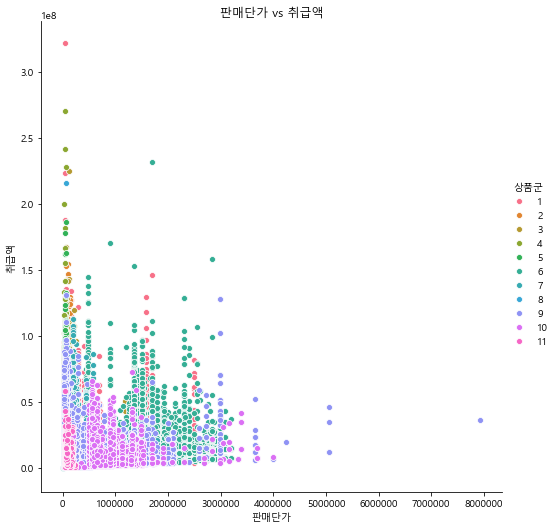

In [45]:
plt.figure()
sns.pairplot(df,x_vars=["판매단가"], y_vars=['취급액'], hue="상품군",size=7)#,kind='scatter' or 'reg')
plt.xlabel("판매단가")
plt.ylabel("취급액")
plt.title("판매단가 vs 취급액")
plt.show()

(array([2.7959e+04, 5.1040e+03, 1.6620e+03, 4.7800e+02, 1.3000e+02,
        3.0000e+01, 5.0000e+00, 3.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.30234899e+00, 5.39242259e+02, 1.07718217e+03, 1.61512208e+03,
        2.15306199e+03, 2.69100190e+03, 3.22894181e+03, 3.76688172e+03,
        4.30482163e+03, 4.84276154e+03, 5.38070145e+03, 5.91864136e+03,
        6.45658127e+03, 6.99452118e+03, 7.53246109e+03, 8.07040100e+03]),
 <a list of 15 Patch objects>)

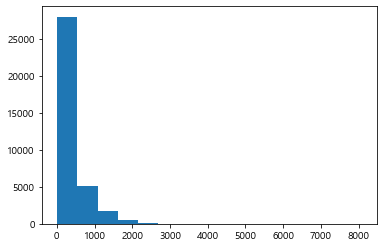

In [46]:
plt.hist(df['주문량'], bins = 15)

Text(0.5, 1.0, '취급액 히스토그램\n')

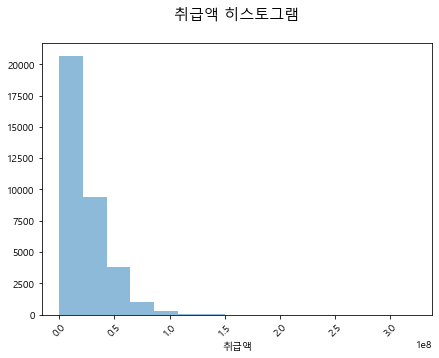

In [47]:
plt.figure(figsize = (7,5))
plt.hist(df['취급액'], bins = 15, alpha = 0.5)
plt.xticks(rotation = 45)
plt.xlabel('취급액')
plt.title('취급액 히스토그램\n', size = 15)

Text(0.5, 1.0, '주문량 히스토그램\n')

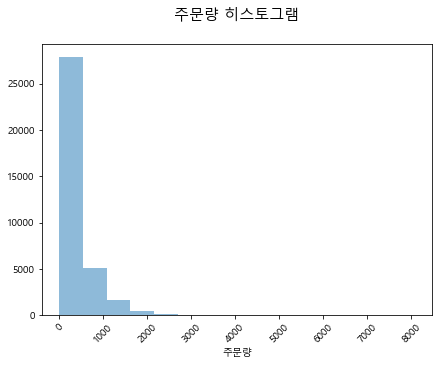

In [48]:
plt.figure(figsize = (7,5))
plt.hist(df['주문량'], bins = 15, alpha = 0.5)
plt.xticks(rotation = 45)
plt.xlabel('주문량')
plt.title('주문량 히스토그램\n', size = 15)

In [49]:
#### 1.

dic = dict()
for i in df['상품군']:
    if (i not in dic):
        dic[i] = 0

In [50]:
##### 1. 상품군 + 취급액 총합

for i in range(len(df)):
    if df.iloc[i]['상품군'] in dic:
        dic[df.iloc[i]['상품군']] = dic[df.iloc[i]['상품군']] + df.iloc[i]['취급액']

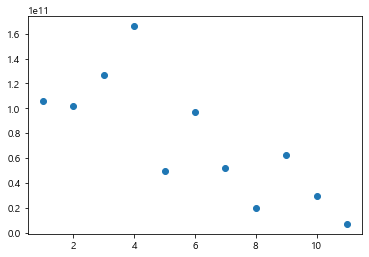

In [51]:
# scatter plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dic.keys(), dic.values())

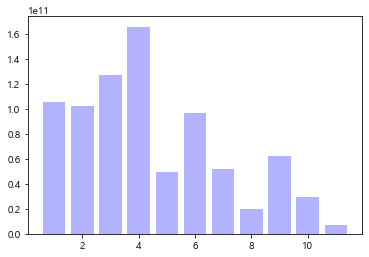

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(dic.keys(), dic.values(), alpha = 0.3, color = 'b')
ax

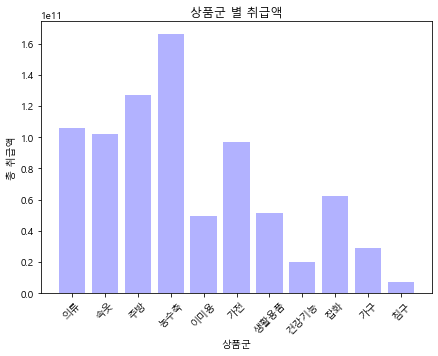

In [53]:
plt.figure(figsize = (7,5))
plt.bar(dic.keys(), dic.values(), color = 'b', alpha = 0.3)
plt.title('상품군 별 취급액')
plt.xlabel('상품군')
plt.ylabel('총 취급액')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['의류', '속옷', '주방', '농수축', 
                                       '이미용', '가전', '생활용품', '건강기능', 
                                       '잡화', '가구', '침구'], rotation = 45)
plt.show()

In [54]:
#### 2 w주문량

dic = dict()
for i in df['상품군']:
    if (i not in dic):
        dic[i] = 0

In [55]:
for i in range(len(df)):
    if df.iloc[i]['상품군'] in dic:
        dic[df.iloc[i]['상품군']] = dic[df.iloc[i]['상품군']] + df.iloc[i]['주문량']

In [56]:
dic.values()

dict_values([1667274.1895415506, 1425038.7341981109, 1252989.1996412084, 3776003.083504564, 1046213.717126509, 100156.68546063465, 501484.70356578776, 294461.8316657541, 925214.507302468, 45413.56159331614, 102963.49914405859])

In [57]:
dic_1 = dict()
for i in df['상품군']:
    if (i not in dic_1):
        dic_1[i] = 0

In [58]:
for i in range(len(df)):
    if df.iloc[i]['상품군'] in dic_1:
        dic_1[df.iloc[i]['상품군']] = dic_1[df.iloc[i]['상품군']] + 1

In [59]:
dic_1.values()

dict_values([4331, 3910, 6571, 3884, 1305, 5163, 2769, 786, 3694, 2302, 664])

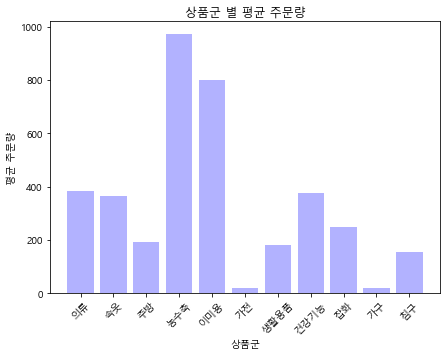

In [60]:
plt.figure(figsize = (7,5))
plt.bar(dic.keys(),[1667274.1895415504/4331, 1425038.7341981109/3910, 1252989.1996412084/6571, 
                    3776003.083504564/3884, 1046213.7171265088/1305, 100156.68546063465/5163, 
                    501484.7035657877/2769, 294461.8316657541/786, 925214.5073024681/3694, 
                    45413.56159331613/2302, 102963.49914405859/664] , color = 'b', alpha = 0.3)
plt.title('상품군 별 평균 주문량')
plt.xlabel('상품군')
plt.ylabel('평균 주문량')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['의류', '속옷', '주방', '농수축', 
                                       '이미용', '가전', '생활용품', '건강기능', 
                                       '잡화', '가구', '침구'], rotation = 45)
plt.show()

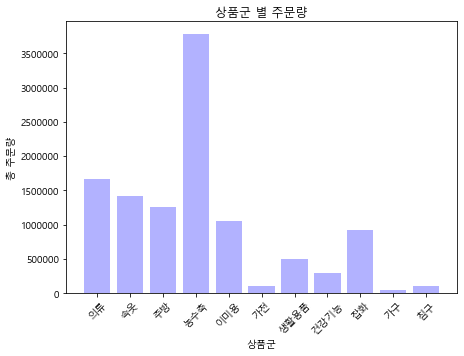

In [61]:
plt.figure(figsize = (7,5))
plt.bar(dic.keys(), dic.values(), color = 'b', alpha = 0.3)
plt.title('상품군 별 주문량')
plt.xlabel('상품군')
plt.ylabel('총 주문량')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['의류', '속옷', '주방', '농수축', 
                                       '이미용', '가전', '생활용품', '건강기능', 
                                       '잡화', '가구', '침구'], rotation = 45)
plt.show()

In [62]:
#### 3 w주문량

dic = dict()
dic[1] = 0
dic[0] = 0

In [63]:
for i in range(len(df)):
    if df.iloc[i]['공휴일'] in dic:
        dic[df.iloc[i]['공휴일']] = dic[df.iloc[i]['공휴일']] + df.iloc[i]['주문량']

In [64]:
dic.items()

dict_items([(1, 506028.1990143474), (0, 10631185.513729615)])

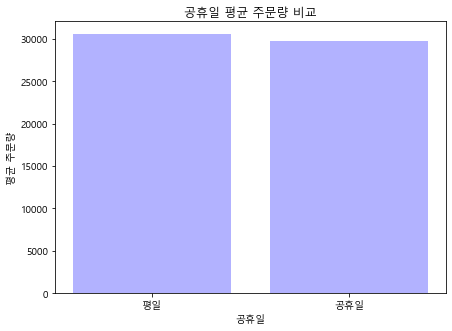

In [65]:
plt.figure(figsize = (7,5))
plt.bar(dic.keys(), [506028.19901434745/(17), 10631185.513729615/(365-17)], color = 'b', alpha = 0.3)
plt.title('공휴일 평균 주문량 비교')
plt.xlabel('공휴일')
plt.ylabel('평균 주문량')
plt.xticks([1, 0], ['공휴일', '평일'], rotation = 0)
plt.show()

In [66]:
#### 4 w주문량

dic = dict()
dic[1] = 0
dic[0] = 0

In [67]:
for i in range(len(df)):
    if df.iloc[i]['강수량(mm)'] != 0:
        dic[1] = dic[1] + df.iloc[i]['주문량']
    else :
        dic[0] = dic[0] + df.iloc[i]['주문량']

In [68]:
dic.items()

dict_items([(1, 3143372.9846537784), (0, 7993840.728090165)])

In [69]:
dic = dict()
dic[1] = 0
dic[0] = 0

for i in range(len(df)):
    if df.iloc[i]['강수량(mm)'] != 0:
        dic[1] = dic[1] + 1
    else :
        dic[0] = dic[0] + 1

In [70]:
dic.items()

dict_items([(1, 9493), (0, 25886)])

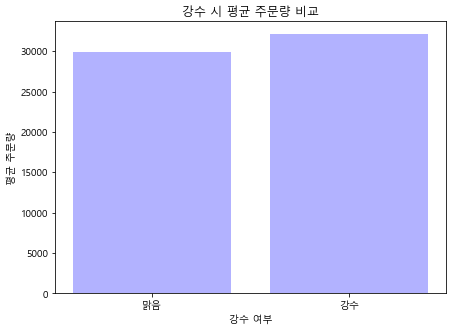

In [71]:
plt.figure(figsize = (7,5))
plt.bar(dic.keys(), [3143372.9846537784/(98), 7993840.728090165/(365-98)], color = 'b', alpha = 0.3)
plt.title('강수 시 평균 주문량 비교')
plt.xlabel('강수 여부')
plt.ylabel('평균 주문량')
plt.xticks([1, 0], ['강수', '맑음'], rotation = 0)
plt.show()

In [72]:
#### 5 w주문량

dic = dict()
for i in df['상품군']:
    if (i not in dic):
        dic[i] = 0

In [73]:
dic_1 = dict()
for i in df['상품군']:
    if (i not in dic_1):
        dic_1[i] = 0

In [74]:
dic_1.items()

dict_items([(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0)])

In [75]:
for i in range(len(df)):
    if df.iloc[i]['강수량(mm)'] != 0:
        dic_1[df.iloc[i]['상품군']] = dic_1[df.iloc[i]['상품군']] + df.iloc[i]['주문량']
    else :
        dic[df.iloc[i]['상품군']] = dic[df.iloc[i]['상품군']] + df.iloc[i]['주문량']


In [76]:
dic.values()

dict_values([1156917.3738338833, 1058109.9386352375, 902041.0708145245, 2723485.7008626717, 736627.405807972, 68675.62151611435, 393313.33241019904, 212337.55410853907, 637867.7558857597, 32267.23951061597, 72197.73470465884])

In [77]:
dic_1.values()

dict_values([510356.81570767454, 366928.7955628698, 350948.1288266849, 1052517.3826418913, 309586.31131853745, 31481.063944520094, 108171.37115558879, 82124.27755721503, 287346.751416712, 13146.322082700186, 30765.76443939972])

In [78]:
'''맑음''' 
top = [1156917.3738338833, 1058109.9386352373, 902041.0708145245, 2723485.7008626717, 736627.4058079718, 68675.62151611435, 393313.33241019904, 212337.55410853907, 637867.7558857598, 32267.23951061597, 72197.73470465883]
'강수'
down = [510356.81570767454, 366928.7955628698, 350948.1288266849, 1052517.3826418913, 309586.31131853745, 31481.063944520098, 108171.37115558877, 82124.27755721503, 287346.751416712, 13146.322082700186, 30765.764439399725]

In [79]:
for i in range(len(top)):
    top[i] = top[i]/(365-98)
for i in range(len(down)):
    down[i] = down[i]/98

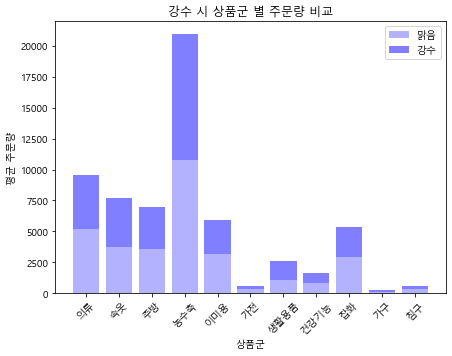

In [80]:
plt.figure(figsize = (7,5))
p1 = plt.bar(dic.keys(), down, color = 'b', alpha = 0.3)
p2 = plt.bar(dic.keys(),top, bottom = down, color = 'b', alpha = 0.5)
plt.title('강수 시 상품군 별 주문량 비교')
plt.xlabel('상품군')
plt.ylabel('평균 주문량')
# plt.xticks([1, 0], ['강수', '맑음'], rotation = 0)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['의류', '속옷', '주방', '농수축', 
                                       '이미용', '가전', '생활용품', '건강기능', 
                                       '잡화', '가구', '침구'], rotation = 45)
plt.legend((p1[0], p2[0]), ('맑음', '강수'), fontsize = 10)
plt.show()

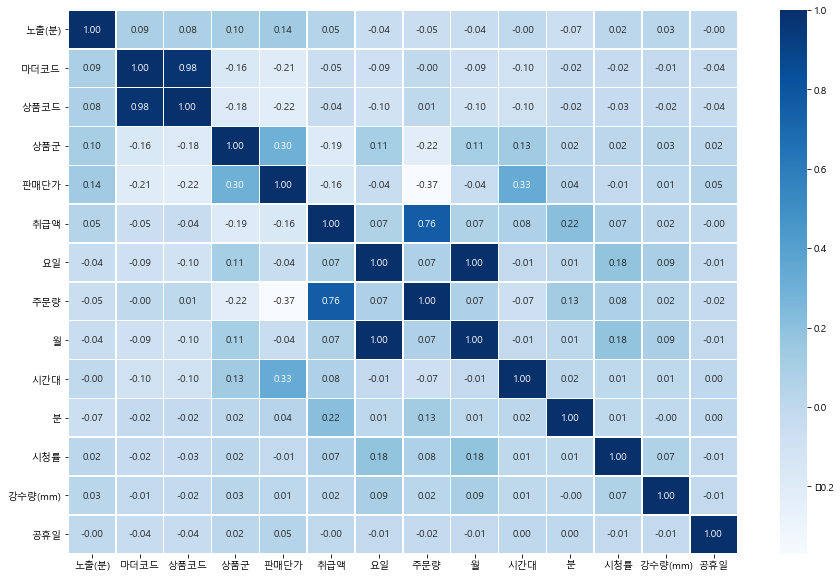

In [81]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

In [82]:
#### 6 w주문량

dic = dict()
dic[1] = 0
dic[2] = 0
dic[3] = 0
dic[4] = 0

In [83]:
for i in range(len(df)):
    if df.iloc[i]['월']<4:
        dic[1] = dic[1] + df.iloc[i]['주문량']
    elif df.iloc[i]['월'] < 7:
        dic[2] = dic[2] + df.iloc[i]['주문량']
    elif df.iloc[i]['월'] < 10:
        dic[3] = dic[3] + df.iloc[i]['주문량']
    else:
        dic[4] = dic[4] + df.iloc[i]['주문량']

In [84]:
dic.values()

dict_values([2510721.9133950244, 2505308.355163952, 2971300.9395639487, 3149882.504621019])

In [85]:
dic = dict()
dic[1] = 0
dic[2] = 0
dic[3] = 0
dic[4] = 0

In [86]:
for i in range(len(df)):
    if df.iloc[i]['월']<4:
        dic[1] = dic[1] + 1
    elif df.iloc[i]['월'] < 7:
        dic[2] = dic[2] + 1
    elif df.iloc[i]['월'] < 10:
        dic[3] = dic[3] + 1
    else:
        dic[4] = dic[4] + 1

In [87]:
dic

{1: 8512, 2: 9272, 3: 9016, 4: 8579}

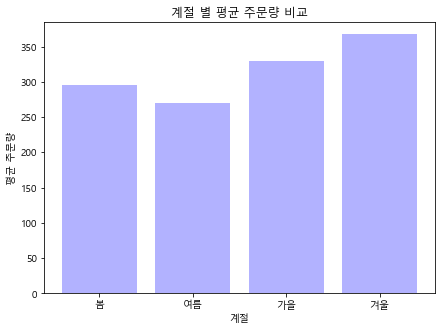

In [88]:
plt.figure(figsize = (7,5))
plt.bar(dic.keys(), [2510721.9133950244/8512, 2505308.355163952/9272, 2971300.9395639487/9016, 
                     3149882.5046210187/8579], color = 'b', alpha = 0.3)
plt.title('계절 별 평균 주문량 비교')
plt.xlabel('계절')
plt.ylabel('평균 주문량')
plt.xticks([1, 2, 3, 4], ['봄', '여름' ,'가을' ,'겨울'], rotation = 0)
plt.show()

In [89]:
#### 7 w주문량

dic = dict()

for i in df['시간대']:
    if (i not in dic):
        dic[i] = 0

In [90]:
for i in range(len(df)):
    if df.iloc[i]['시간대'] in dic:
        dic[df.iloc[i]['시간대']] = dic[df.iloc[i]['시간대']] + df.iloc[i]['주문량']

In [91]:
dic.values()

dict_values([327511.832284979, 574005.6528468711, 561824.6911224821, 623696.8470644531, 631146.3506940661, 659549.8326719999, 552032.6960866957, 646384.43445658, 650371.74343857, 694867.6987396983, 974120.6871738681, 1012707.4877320185, 717429.1133396699, 509020.9605702585, 461746.64340770646, 360433.7354028702, 296701.0601472229, 300660.4921394354, 303715.87631248863, 262402.52632857655, 16883.350783462352])

In [92]:
dic = dict()

for i in df['시간대']:
    if (i not in dic):
        dic[i] = 0

In [93]:
for i in range(len(df)):
    if df.iloc[i]['시간대'] in dic:
        dic[df.iloc[i]['시간대']] = dic[df.iloc[i]['시간대']] + 1

In [94]:
dic.values()

dict_values([1329, 1460, 1599, 1553, 1875, 1823, 1746, 1649, 1654, 1592, 1372, 1350, 1162, 1746, 2262, 3013, 3153, 2066, 1407, 1498, 70])

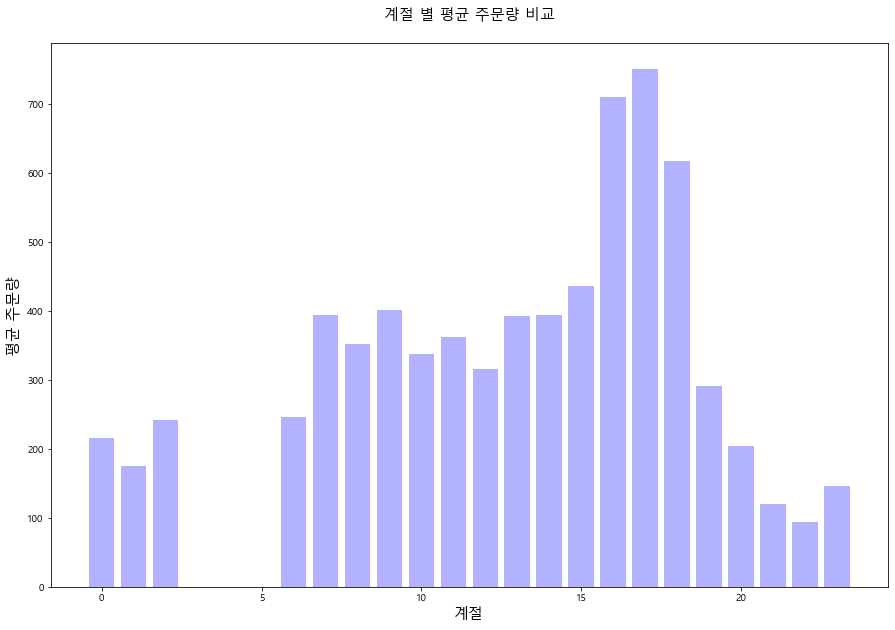

In [95]:
plt.figure(figsize = (15,10))
plt.bar(dic.keys(), [327511.832284979/1329, 574005.6528468711/1460, 561824.6911224821/1599, 
                     623696.8470644531/1553, 631146.3506940661/1875, 659549.832672/1823, 
                     552032.6960866958/1746, 646384.4344565797/1649, 650371.7434385698/1654, 
                     694867.6987396983/1592, 974120.6871738681/1372, 1012707.4877320185/1350, 
                     717429.1133396699/1162, 509020.9605702585/1746, 461746.6434077064/2262, 
                     360433.7354028702/3013, 296701.0601472229/3153, 300660.49213943543/2066, 
                     303715.87631248863/1407, 262402.52632857655/1498, 16883.35078346235/70], color = 'b', alpha = 0.3)
plt.title('계절 별 평균 주문량 비교\n', size = 15)
plt.xlabel('계절', size = 15)
plt.ylabel('평균 주문량', size = 15)
# plt.xticks([1, 2, 3, 4], ['봄', '여름' ,'가을' ,'겨울'], rotation = 0)
plt.show()

# 회귀분석

선형회귀분석(최소제곱법)

In [96]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
#상품군이 실제 취급액에 영향을 미치는지 알아보기
model = smf.ols(formula = '취급액 ~ 상품군', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    취급액   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1304.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          1.96e-280
Time:                        14:48:19   Log-Likelihood:            -6.4443e+05
No. Observations:               35379   AIC:                         1.289e+06
Df Residuals:                   35377   BIC:                         1.289e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.951e+07   2.06e+05    143.187      0.000    2.91e+07    2.99e+07
상품군        -1.302e+06   3.61e+04    -36.110      0.000   -1.37e+06   -1.23e+06
==============================================================================
Omnibus:                    14587.045   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103416.293
Skew:                           1.829   Prob(JB):                         0.00
Kurtosis:                      10.535   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다중회귀분석

In [98]:
#상품군,주문량이 실제 취급액에 영향을 미치는지 알아보기
model = smf.ols(formula = '취급액 ~ 상품군 + 주문량', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    취급액   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 2.469e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:48:19   Log-Likelihood:            -6.2961e+05
No. Observations:               35379   AIC:                         1.259e+06
Df Residuals:                   35376   BIC:                         1.259e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.254e+07   1.57e+05     79.982      0.000    1.22e+07    1.29e+07
상품군        -1.302e+05   2.43e+04     -5.349      0.000   -1.78e+05   -8.25e+04
주문량         3.558e+04    165.215    215.350      0.000    3.53e+04    3.59e+04
==============================================================================
Omnibus:                    19775.511   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247004.049
Skew:                           2.447   Prob(JB):                         0.00
Kurtosis:                      14.984   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
#판매단가가 실제 취급액에 영향을 미치는지 알아보기
model = smf.ols(formula = '취급액 ~ 상품군 + 시청률 + 주문량 + 판매단가', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    취급액   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 1.337e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:48:19   Log-Likelihood:            -6.2878e+05
No. Observations:               35379   AIC:                         1.258e+06
Df Residuals:                   35374   BIC:                         1.258e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.101e+07    1.6e+05     68.946      0.000    1.07e+07    1.13e+07
상품군        -3.771e+05   2.45e+04    -15.384      0.000   -4.25e+05   -3.29e+05
시청률         3.188e+07   8.27e+06      3.854      0.000    1.57e+07    4.81e+07
주문량         3.781e+04    171.170    220.880      0.000    3.75e+04    3.81e+04
판매단가           4.8992      0.119     41.123      0.000       4.666       5.133
==============================================================================
Omnibus:                    18780.614   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222232.904
Skew:                           2.302   Prob(JB):                         0.00
Kurtosis:                      14.383   Cond. No.                     9.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

선형회귀분석

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,분,날짜,시청률,강수량(mm),공휴일
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,1,52.606516,1,6,0,2019-01-01,0.0000,0.0,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,1,109.548872,1,6,0,2019-01-01,0.0000,0.0,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,1,81.754386,1,6,20,2019-01-01,0.0000,0.0,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,1,174.310777,1,6,20,2019-01-01,0.0000,0.0,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,1,167.218045,1,6,40,2019-01-01,0.0000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20,100448,201391,일시불쿠첸압력밥솥 6인용,3,148000,10157000,12,68.628378,12,23,40,2019-12-31,0.0206,0.0,0
37368,2020-01-01 00:00:00,20,100448,201383,무이자쿠첸압력밥솥 10인용,3,178000,50929000,1,286.117978,1,0,0,2020-01-01,0.0000,0.1,0
37369,2020-01-01 00:00:00,20,100448,201390,일시불쿠첸압력밥솥 10인용,3,168000,104392000,1,621.380952,1,0,0,2020-01-01,0.0000,0.1,0
37370,2020-01-01 00:00:00,20,100448,201384,무이자쿠첸압력밥솥 6인용,3,158000,13765000,1,87.120253,1,0,0,2020-01-01,0.0000,0.1,0


In [102]:
x=df.iloc[:, [2,3, 5, 6, 8, 10, 11, 12, 14]]
y=df.iloc[:, [7]]

In [103]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_(x,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((28303, 9), (7076, 9), (28303, 1), (7076, 1))

In [104]:
df.isnull().sum()

방송일시       0
노출(분)      0
마더코드       0
상품코드       0
상품명        0
상품군        0
판매단가       0
취급액        0
요일         0
주문량        0
월          0
시간대        0
분          0
날짜         0
시청률        0
강수량(mm)    0
공휴일        0
dtype: int64

In [105]:
df.shape

(35379, 17)

In [106]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
model.score(X_test, y_test)

0.1326851570584472

In [108]:
y_pred=model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

18797044.243279215

Ridge 모델

In [109]:
model = Ridge(alpha = 0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.13261717609708756

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

18797780.893937368

Lasso 모델

In [111]:
model = Lasso(alpha = 0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.13268514127449516

In [112]:
np.sqrt(mean_squared_error(y_test,y_pred))

18797044.414319552

DecisionTree(의사결정나무)

In [113]:
tree = DecisionTreeRegressor(random_state = 13, max_depth = 10)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

tree.score(X_test,y_test)

0.507971151764051

In [114]:
np.sqrt(mean_squared_error(y_test,y_pred))

14157822.31774105

In [115]:
#트리의 크기를 확인하는 방법
tree.tree_.max_depth

10

RandomForest(랜덤포레스트)

In [116]:
fr=RandomForestRegressor(random_state = 15)
fr.fit(X_train, y_train)
y_pred = fr.predict(X_test)

fr.score(X_test, y_test)

0.6759732800511472

In [117]:
np.sqrt(mean_squared_error(y_test, y_pred))

11489247.538141824

XGBoost

In [118]:
gb=GradientBoostingRegressor(random_state = 11,learning_rate=0.1,max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4, 
                             n_estimators=1000)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
gb.score(X_test, y_test)

0.7258505210189696

In [119]:
np.sqrt(mean_squared_error(y_test, gb_pred))

10568050.663944623

DNN 딥러닝

In [120]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

#   optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model

In [121]:
model = build_model()

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
____________________________________________________

In [123]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 5

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


.....

In [124]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
0,4.303440e+14,4.303438e+14,3.884214e+14,3.884212e+14,0
1,3.619403e+14,3.619403e+14,3.862006e+14,3.862006e+14,1
2,3.605106e+14,3.605107e+14,3.836967e+14,3.836967e+14,2
3,3.602907e+14,3.602907e+14,3.831930e+14,3.831931e+14,3
4,3.599675e+14,3.599677e+14,3.847275e+14,3.847276e+14,4


In [125]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

7076/7076 [==============================] - 0s 44us/sample - loss: 368467567242729.1250 - mse: 368467626688512.0000


In [126]:
test_mse_score

368467567242729.1

In [127]:
test_mae_score

368467630000000.0

In [128]:
y_pred = model.predict(X_test)

In [129]:
np.sqrt(mean_squared_error(y_test, y_pred))

19195508.93825444

# 평가데이터 예측

## 평가데이터 전처리

In [130]:
df_1=pd.read_excel('제공데이터/평가데이터.xlsx', encoding='utf-8', header=1)
df_1.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [131]:
del df_1['취급액']

In [132]:
df_1=df_1.drop(df_1[df_1['상품군']=='무형'].index)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    2716 non-null   datetime64[ns]
 1   노출(분)   1617 non-null   float64       
 2   마더코드    2716 non-null   int64         
 3   상품코드    2716 non-null   int64         
 4   상품명     2716 non-null   object        
 5   상품군     2716 non-null   object        
 6   판매단가    2716 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 169.8+ KB


In [133]:
df_1=df_1.fillna(method = 'ffill')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    2716 non-null   datetime64[ns]
 1   노출(분)   2716 non-null   float64       
 2   마더코드    2716 non-null   int64         
 3   상품코드    2716 non-null   int64         
 4   상품명     2716 non-null   object        
 5   상품군     2716 non-null   object        
 6   판매단가    2716 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 169.8+ KB


In [134]:
df_1=df_1.replace(['의류', '속옷', '주방', '농수축', '이미용', '가전',  '생활용품', '건강기능', '잡화', '가구', '침구'],
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [135]:
df_1['요일']=df_1['방송일시'].dt.month
df_1=df_1.replace(['월', '화', '수', '목', '금', '토', '일'], [1, 2, 3, 4, 5, 6, 7])

In [136]:
df_1= df_1.astype({'노출(분)':'int64'})
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    2716 non-null   datetime64[ns]
 1   노출(분)   2716 non-null   int64         
 2   마더코드    2716 non-null   int64         
 3   상품코드    2716 non-null   int64         
 4   상품명     2716 non-null   object        
 5   상품군     2716 non-null   int64         
 6   판매단가    2716 non-null   int64         
 7   요일      2716 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 191.0+ KB


In [137]:
df_1['월']=df_1['방송일시'].dt.month
df_1['시간대']=df_1['방송일시'].dt.hour
df_1['날짜']=df_1['방송일시'].dt.day
df_1['분']=df_1['방송일시'].dt.minute
df_1.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,요일,월,시간대,날짜,분
0,2020-06-01 06:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,1,59800,6,6,6,1,20
1,2020-06-01 06:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,1,59800,6,6,6,1,40
2,2020-06-01 07:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,1,59800,6,6,7,1,0
3,2020-06-01 07:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,2,69900,6,6,7,1,20
4,2020-06-01 07:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,2,69900,6,6,7,1,40


In [138]:
df_1['시간대']=df_1['방송일시'].dt.hour
df_1.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,요일,월,시간대,날짜,분
0,2020-06-01 06:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,1,59800,6,6,6,1,20
1,2020-06-01 06:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,1,59800,6,6,6,1,40
2,2020-06-01 07:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,1,59800,6,6,7,1,0
3,2020-06-01 07:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,2,69900,6,6,7,1,20
4,2020-06-01 07:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,2,69900,6,6,7,1,40


In [139]:
X_train

,마더코드,상품코드,상품군,판매단가,요일,월,시간대,분,시청률
12650,100770,202250,3,179000,5,5,18,40,0.016650
36038,100327,201030,5,54000,12,12,21,0,0.012250
16328,100469,201436,7,44800,6,6,23,40,0.000000
14681,100837,202465,3,218000,5,5,12,0,0.001450
14559,100185,200620,9,48900,5,5,7,20,0.012700
...,...,...,...,...,...,...,...,...,...
17969,100683,202032,3,164000,6,6,19,30,0.012167
6573,100335,201047,1,39900,3,3,6,0,0.000550
11968,100377,201230,1,59900,4,4,23,0,0.000350
882,100148,200432,6,1440000,1,1,22,40,0.000000


## XGBoost를 활용한 예측

## 취급액 예측

In [140]:
x_data = df_1.iloc[:, [2,3, 5, 6, 7, 8, 9, 10, 11]]

In [141]:
x_data.shape

(2716, 9)

In [142]:
gb_pred_real = gb.predict(x_data)

In [143]:
gb_pred_real.shape

(2716,)

In [144]:
gb_pred_real

array([ 3652684.11154449,  3652684.11154449, 10662982.25501615, ...,
       16589784.87465415,  8060529.43895947,  8060529.43895947])

## 평가데이터 합치기

In [145]:
df_1=pd.read_excel('제공데이터/평가데이터.xlsx', encoding='utf-8', header=1)
df_1.head(5)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [146]:
cnt = 0

for i in x_data.index:
    df_1.at[i, '취급액'] = gb_pred_real[cnt]
    cnt = cnt + 1

In [147]:
df_1

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.652684e+06
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3.652684e+06
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,1.066298e+07
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,2.154453e+07
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,2.154453e+07
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,8.060529e+06


In [148]:
cnt = 0

for i in df_1[df_1['상품군']=='무형'].index:
    df_1.at[i, '취급액'] = 0
    cnt = cnt + 1

In [149]:
df_1= df_1.astype({'취급액':'int64'})

In [150]:
df_1

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3652684
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,3652684
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,10662982
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,21544534
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,21544534
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,0
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,0
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,0
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,8060529


# 편성시간 추천(최적화) 알고리즘

In [151]:
# 테스트 데이터 세트를 활용
# ppt 와 코드에서 차이는 train_test_split의 과정과 데이터 선택에서
# 차이가 생겨서 약간 다르게 나온 것 같습니다

판매 '월' 최적화

In [152]:
b=pd.DataFrame()
b[1]=y_test['취급액']
b[2]=gb_pred
b[2]=b[2].astype('int64')
b[3]=list(X_test['월'])
b[4]=b[[1,2]].max(axis=1)
b

,1,2,3,4
36022,32183000,45597169,12,45597169
10571,14331000,14020632,4,14331000
6790,25425000,37556601,3,37556601
206,5224000,6284094,1,6284094
14129,26930000,21429382,5,26930000
...,...,...,...,...
19437,14774000,14672302,7,14774000
3883,9799000,15095235,2,15095235
21275,5067000,7166205,7,7166205
31639,40581000,67191382,11,67191382


In [153]:
# 월에 대한 취급액 최적화 추천

for i in [1,2,3,4,5,6,7,8,9,10, 11,12]:
    X_test['월'] = i
    y_pred = fr.predict(X_test)[:].flatten()

    b[2] = list(y_pred)
    b[2] = b[2].astype('int64')
    b[4] = b[[1,2]].max(axis=1)

    b.loc[b[1] != b[4],3]=i
    b[1]=b[4]
b

,1,2,3,4
36022,48609575,42055820,6,48609575
10571,15433007,11447163,3,15433007
6790,30646415,25262051,1,30646415
206,10649906,9781286,10,10649906
14129,26930000,17795100,5,26930000
...,...,...,...,...
19437,18608280,15820798,6,18608280
3883,9799000,7155410,2,9799000
21275,16184446,15969423,11,16184446
31639,68170230,55343930,7,68170230


for반복문에서 바뀐 X_test['월']을 초기화시켜주기 위함

In [154]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((28303, 9), (7076, 9), (28303, 1), (7076, 1))

In [155]:
d=pd.DataFrame()
d[1]=y_test['취급액']
d[2]=list(X_test['월'])
d[3]=list(b[3])
d[4]=list(b[4])
d[d[2]!=d[3]]

,1,2,3,4
36022,32183000,12,6,48609575
10571,14331000,4,3,15433007
6790,25425000,3,1,30646415
206,5224000,1,10,10649906
10357,4810000,4,3,22852477
...,...,...,...,...
729,18900000,1,4,32388250
25848,48757000,9,10,55673860
19437,14774000,7,6,18608280
21275,5067000,7,11,16184446


실제 판매 '월'과 추천 판매 '월'이 다른 데이터

In [156]:
d[d[2] != d[3]]

,1,2,3,4
36022,32183000,12,6,48609575
10571,14331000,4,3,15433007
6790,25425000,3,1,30646415
206,5224000,1,10,10649906
10357,4810000,4,3,22852477
...,...,...,...,...
729,18900000,1,4,32388250
25848,48757000,9,10,55673860
19437,14774000,7,6,18608280
21275,5067000,7,11,16184446


판매 '요일' 최적화

In [157]:
e=pd.DataFrame()
e[1]=y_test['취급액']
e[2]=gb_pred
e[2]=e[2].astype('int64')
e[3]=list(X_test['요일'])
e[4]=e[[1,2]].max(axis=1)
e

,1,2,3,4
36022,32183000,45597169,12,45597169
10571,14331000,14020632,4,14331000
6790,25425000,37556601,3,37556601
206,5224000,6284094,1,6284094
14129,26930000,21429382,5,26930000
...,...,...,...,...
19437,14774000,14672302,7,14774000
3883,9799000,15095235,2,15095235
21275,5067000,7166205,7,7166205
31639,40581000,67191382,11,67191382


In [158]:
# 요일에 대한 취급액 최적화 추천

for i in [1,2,3,4,5,6,7]:
    X_test['요일'] = i
    y_pred = gb.predict(X_test)[:].flatten()

    e[2] = list(y_pred)
    e[2] = e[2].astype('int64')
    e[4] = e[[1,2]].max(axis=1)

    e.loc[e[1] != e[4],3]=i
    e[1]=e[4]
e

,1,2,3,4
36022,54527389,51127442,1,54527389
10571,15145521,12499228,1,15145521
6790,41886169,37744866,1,41886169
206,6975753,6225074,6,6975753
14129,26930000,22167102,5,26930000
...,...,...,...,...
19437,17413865,14672302,1,17413865
3883,15764410,13714596,1,15764410
21275,7166205,7166205,7,7166205
31639,70823255,69795776,6,70823255


In [159]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((28303, 9), (7076, 9), (28303, 1), (7076, 1))

In [160]:
f=pd.DataFrame()
f[1]=y_test['취급액']
f[2]=list(X_test['요일'])
f[3]=list(e[3])
f[4]=list(e[4])
f[f[2]!=f[3]]

,1,2,3,4
36022,32183000,12,1,54527389
10571,14331000,4,1,15145521
6790,25425000,3,1,41886169
206,5224000,1,6,6975753
10357,4810000,4,2,16972809
...,...,...,...,...
25848,48757000,9,1,56177300
19437,14774000,7,1,17413865
3883,9799000,2,1,15764410
31639,40581000,11,6,70823255


실제 판매 '요일'과 추천 판매 '요일'이 다른 데이터

In [161]:
f[f[2] != f[3]]

,1,2,3,4
36022,32183000,12,1,54527389
10571,14331000,4,1,15145521
6790,25425000,3,1,41886169
206,5224000,1,6,6975753
10357,4810000,4,2,16972809
...,...,...,...,...
25848,48757000,9,1,56177300
19437,14774000,7,1,17413865
3883,9799000,2,1,15764410
31639,40581000,11,6,70823255


판매 '시간대' 최적화

In [162]:
c = pd.DataFrame()
c[1] = list(y_test['취급액'])
c[2] = 0 
c[3] = list(X_test['시간대'])
c[4] = c[[1,2]].max(axis = 1)
c

,1,2,3,4
0,32183000,0,17,32183000
1,14331000,0,22,14331000
2,25425000,0,9,25425000
3,5224000,0,15,5224000
4,26930000,0,0,26930000
...,...,...,...,...
7071,14774000,0,20,14774000
7072,9799000,0,19,9799000
7073,5067000,0,13,5067000
7074,40581000,0,14,40581000


In [163]:
# 시간대에 대한 취급액 최적화 추천

for i in [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
    X_test['시간대'] = i
    y_pred = gb.predict(X_test)[:].flatten()

    c[2] = list(y_pred)
    c[2] = c[2].astype('int64')
    c[4] = c[[1,2]].max(axis=1)

    c.loc[c[1] != c[4],3]=i
    c[1]=c[4]

c.head(10)

,1,2,3,4
0,65285208,46296033,21,65285208
1,15510736,15091568,21,15510736
2,41921547,35320010,21,41921547
3,26657974,11879000,0,26657974
4,34143699,18918573,11,34143699
5,17167830,17167830,23,17167830
6,30680111,15826060,21,30680111
7,16796682,16796682,23,16796682
8,19051412,19051412,23,19051412
9,86213698,59622657,21,86213698


In [164]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((28303, 9), (7076, 9), (28303, 1), (7076, 1))

In [165]:
g = pd.DataFrame()
g[1] = list(y_test['취급액'])
g[2] = list(X_test['시간대'])
g[3] = list(c[3])
g[4] = list(c[4])
g

,1,2,3,4
0,32183000,17,21,65285208
1,14331000,22,21,15510736
2,25425000,9,21,41921547
3,5224000,15,0,26657974
4,26930000,0,11,34143699
...,...,...,...,...
7071,14774000,20,21,21656167
7072,9799000,19,21,17812934
7073,5067000,13,23,9947292
7074,40581000,14,16,69053609


실제 판매 '시간대'와 추천 판매 '시간대'가 다른 데이터

In [166]:
g[g[2]!=g[3]]

,1,2,3,4
0,32183000,17,21,65285208
1,14331000,22,21,15510736
2,25425000,9,21,41921547
3,5224000,15,0,26657974
4,26930000,0,11,34143699
...,...,...,...,...
7071,14774000,20,21,21656167
7072,9799000,19,21,17812934
7073,5067000,13,23,9947292
7074,40581000,14,16,69053609


In [167]:
y_test

,취급액
36022,32183000
10571,14331000
6790,25425000
206,5224000
14129,26930000
...,...
19437,14774000
3883,9799000
21275,5067000
31639,40581000
